# Map Projections
Created and tested by A. Newman on 9/23/2022

**G**eneric **M**apping **T**ools was originally developed for creating useful and repeatable _maps_, but has expanded to a number of differing plotting types that can be used stand-alone of in conjunction with maps

We will be following some of the examples from here: https://www.pygmt.org/latest/projections/index.html 

I will show a few of the linked examples with my own flair.  Projections are almost limitless

## Cylindrical projections

### Global Mercator
This projection maintains angles, but horribly exagerates high latitudes
Generally not a great choice for global plotting, or event plotting information over large or high latitudes

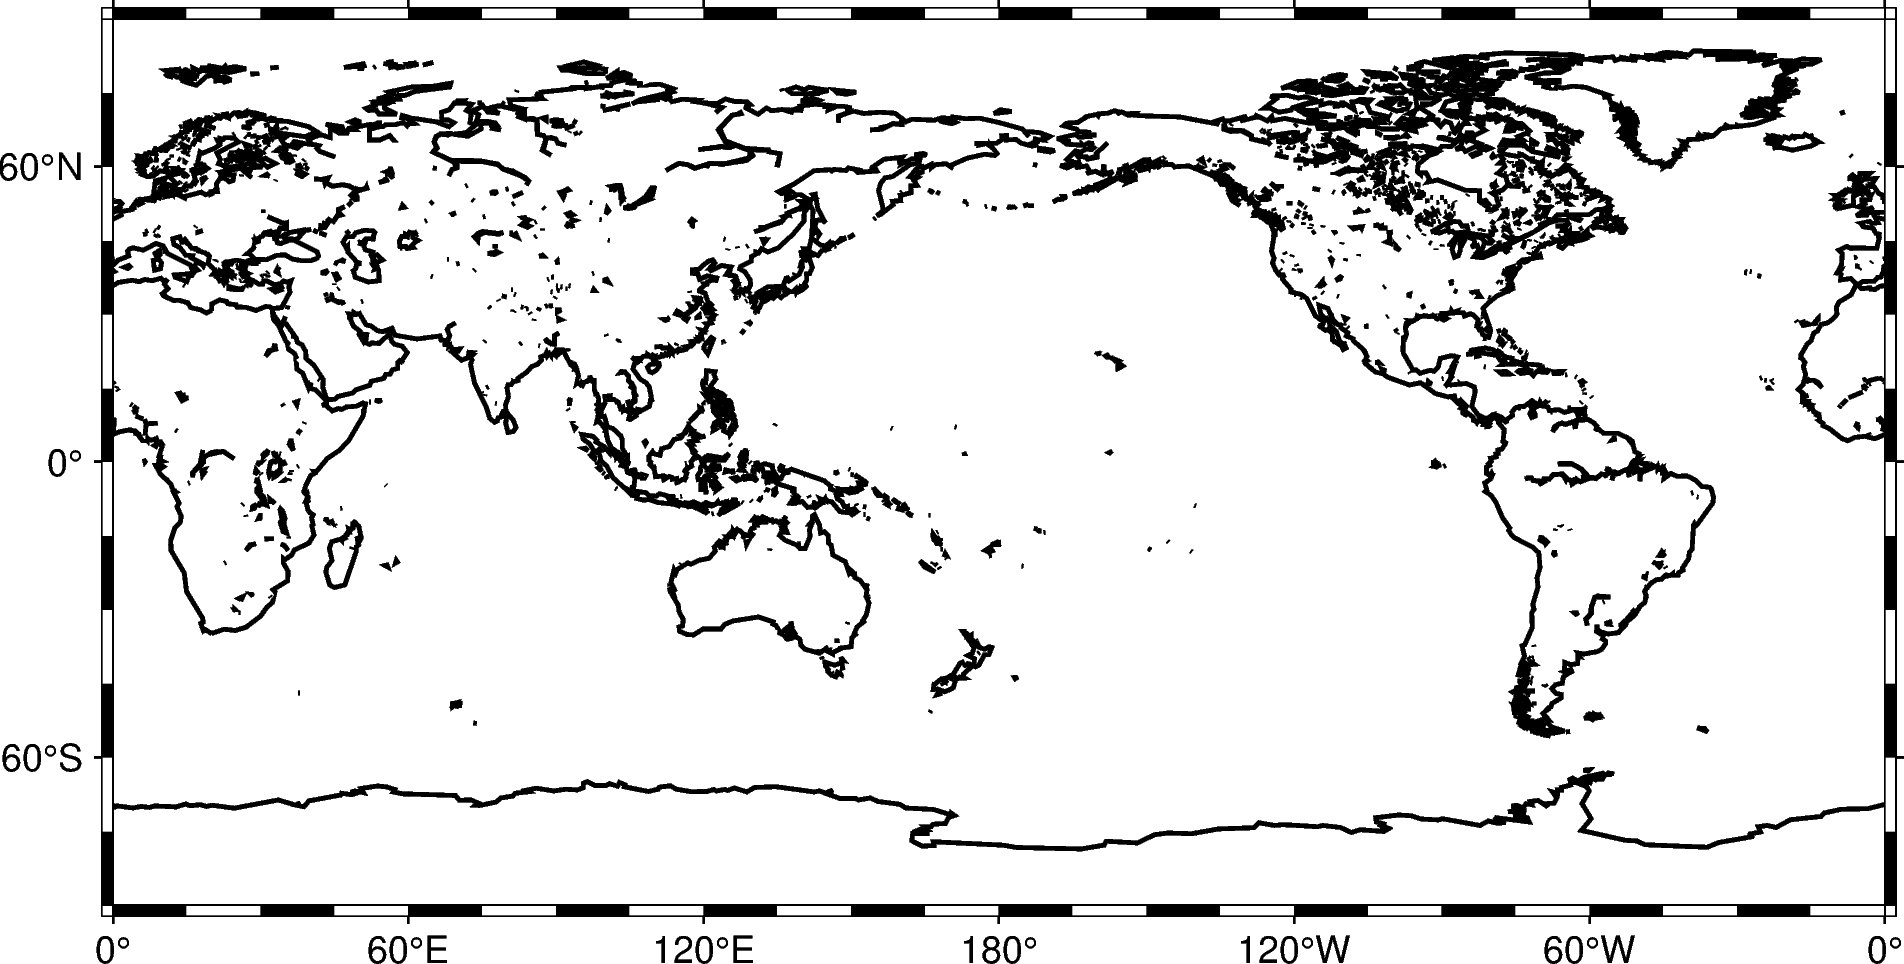

In [1]:
import pygmt

fig1=pygmt.Figure()
fig1.coast(region='g',frame=True, shorelines=1)
fig1.show()

### Local Mercator
Perfectly useable at low-latitudes.  Maintains angles, but not area

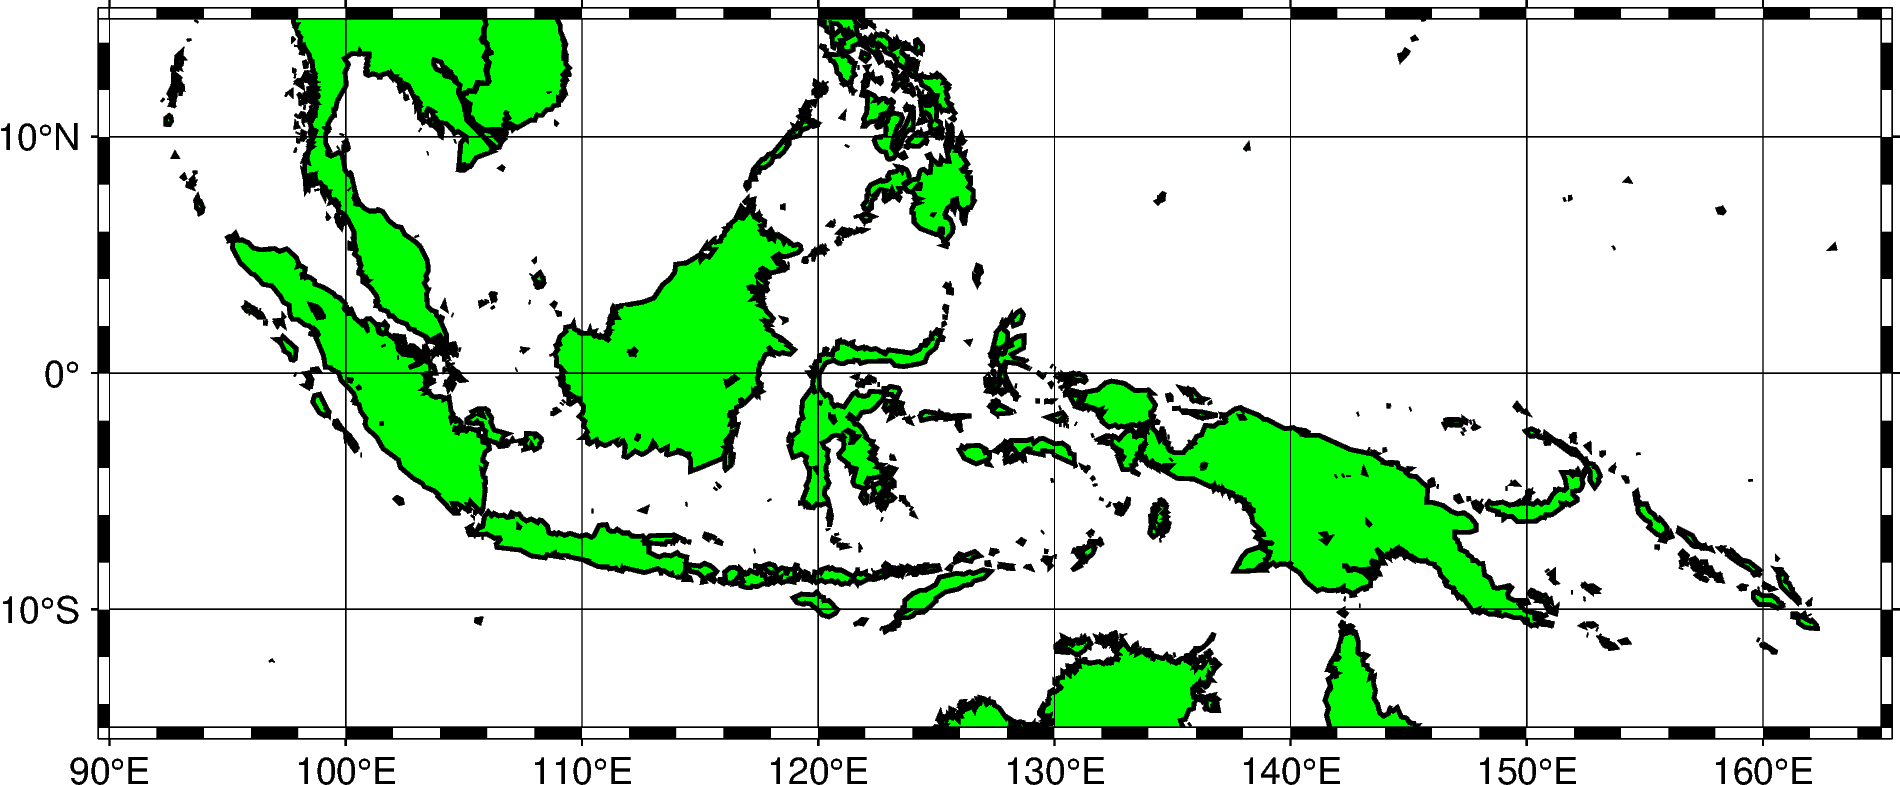

In [2]:
fig2=pygmt.Figure()
fig2.coast(region=[90,165,-15,15],  # xmin,xmax,ymin,ymax
           frame='afg',    # 'afg' a=automatic sizing, f=fancy, g=gridded
           land='green', 
           shorelines='1')
fig2.show()

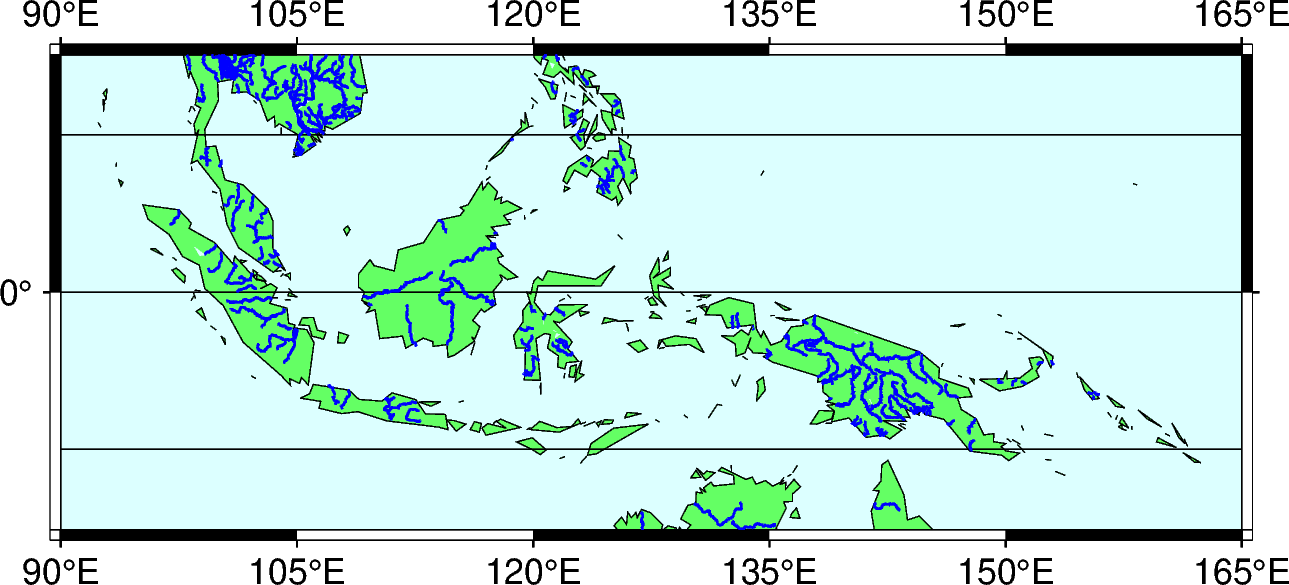

In [3]:
# boring but specific frame
fig3=pygmt.Figure()
fig3.coast(region=[90,165,-15,15], 
           frame=['WSeN','xa15', 'ya20g10'], 
           land='100/255/100', water='220/255/255', shorelines='1/0.2p',   # r/g/b   national/pen-width 
           resolution='c',  # resolution detail 
            #  [f]ull/[h]igh/[i]ntermediate/[l]ow/[c]rude
           projection='M0/0/10c') # We are now defining a particular projection
            # Cap 'M' is Mercator with scale defined by total width of plot
            # small 'm' would be defined per degree
            # 0/0 defined the lon0/lat0 defined projection center postion
            # /10c defines the plot to be 10c in width 
            #   !! this is not the plotting with in jupyter, but the 'postscript width'
            #      that would be used for plotting larger numbers 
            #      will appear to make the default text smaller 
            #      but will not change the figure size as shown here.
            #      (More on this later)

# add rivers (adding a layer atop plot--more later)
fig3.coast(#region/frame already defined and plotted
           rivers='a/0.5p,blue',   
           resolution='f',  # full resolution rivers
           )

fig3.show()

### oblique merc.

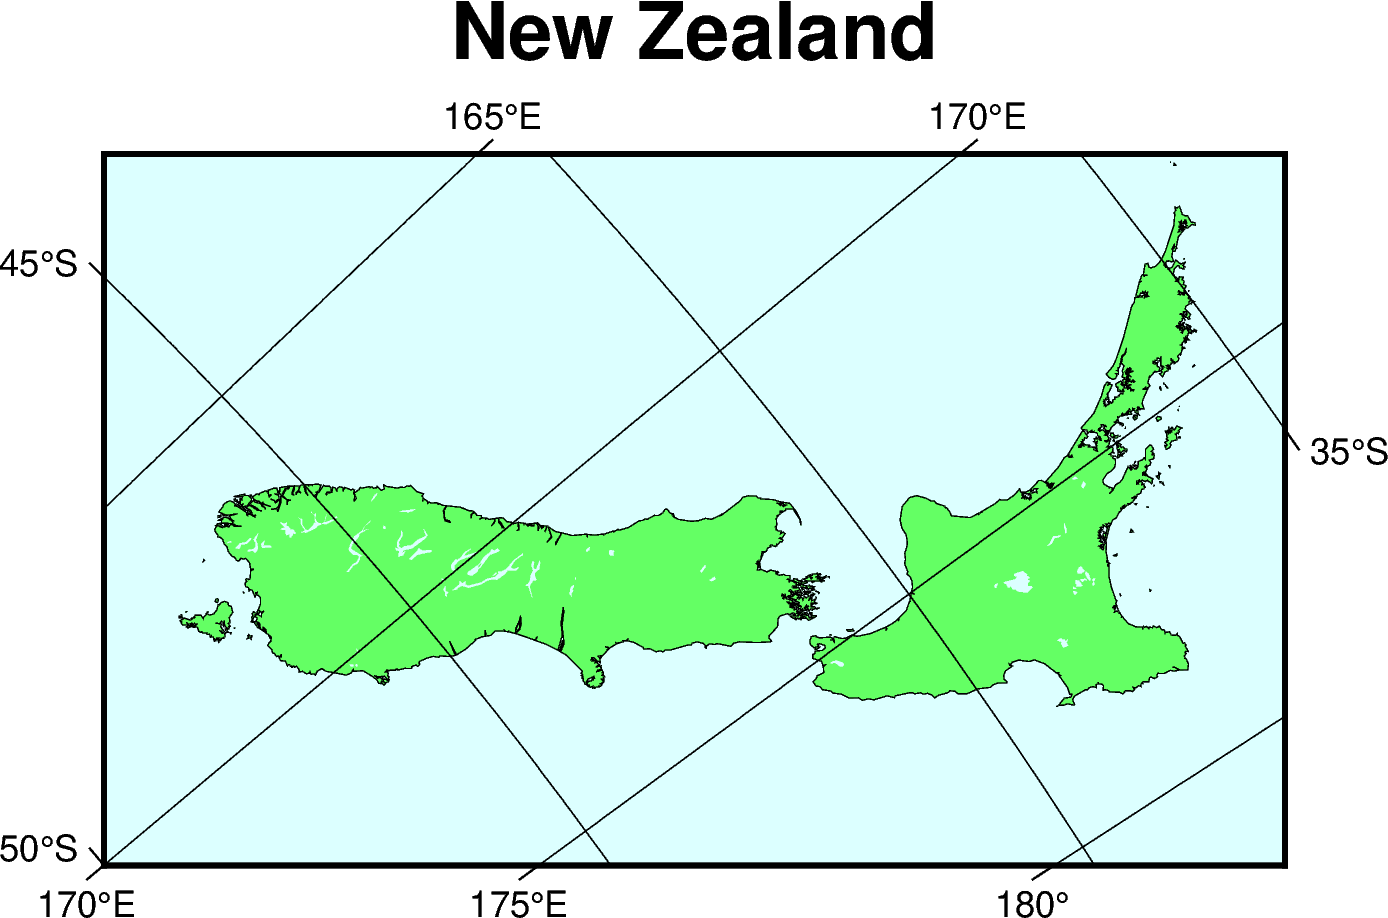

In [4]:
# New Zealand
fig4=pygmt.Figure()
fig4.coast(projection='OA170/-50/40/10c',  #OA (oblique southern hem.--'a' for North) 170/50 central meridian, 40 azimuth
           region='170/-50/173/-33+r',  # lowerleft long/lat upperright long/lat 
           frame=['WSEN+tNew Zealand','xa5g5', 'ya5g5'], 
           land='100/255/100', water='220/255/255', shorelines='1/0.2p',
          )
fig4.show()

## Conic


### Albers Equal Area
works best for plots over larger East-West Distances, particularly away from equator



coast [WARNING]: 8 annotations along the top border were skipped due to crowding.
coast [WARNING]: Crowding decisions is controlled by MAP_ANNOT_MIN_SPACING, currently set to 24.07p.
coast [WARNING]: Decrease or increase MAP_ANNOT_MIN_SPACING to see more or fewer annotations, with 0 showing all annotations.


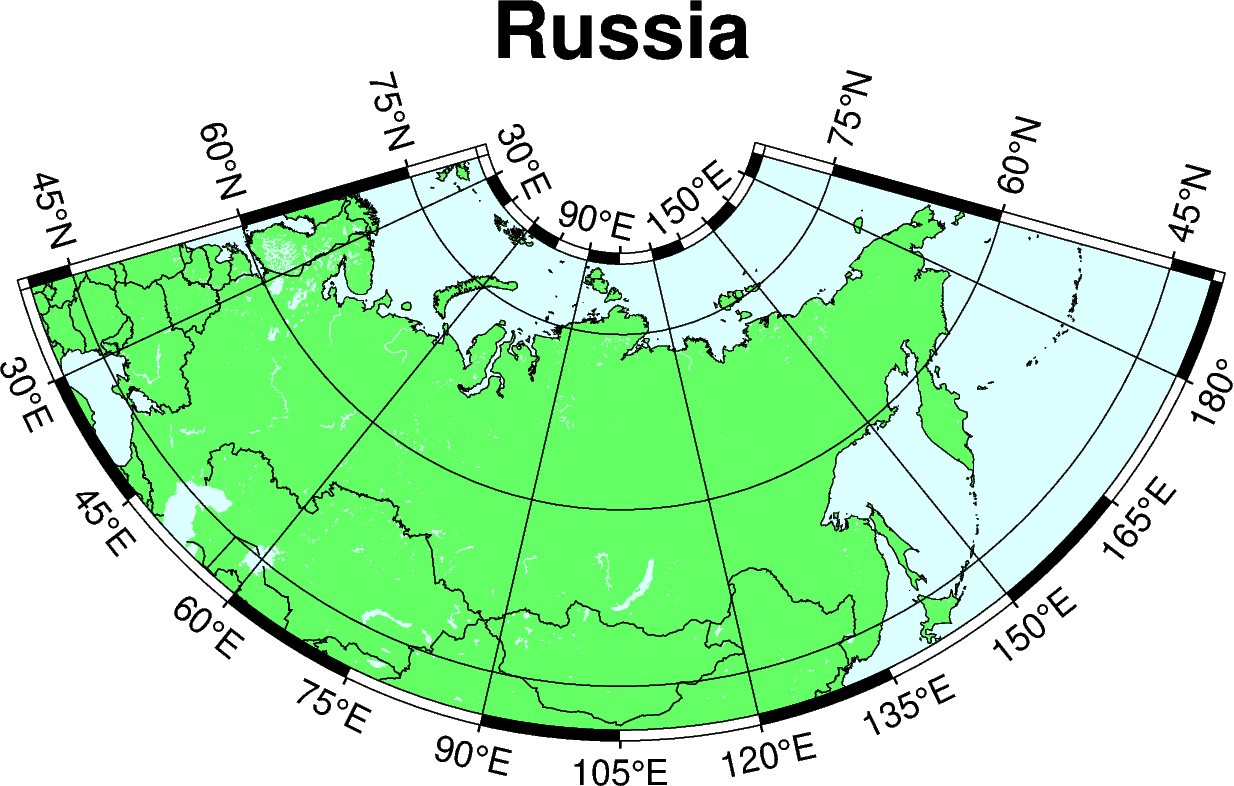

In [5]:
# Russia
fig5=pygmt.Figure()
fig5.coast(projection='B105/50/120/60/10c',  #B 
           region='RU',  # lowerleft long/lat upperright long/lat 
           frame=['WSEN+tRussia','xa15g30', 'ya15g15'], 
           land='100/255/100', water='220/255/255', shorelines='1/0.2p',
           resolution='l', 
           borders=1
          )
fig5.show()

## Azimuthal

### Orthographic 
as example (gives a glob apparence with significant distortion at edges)

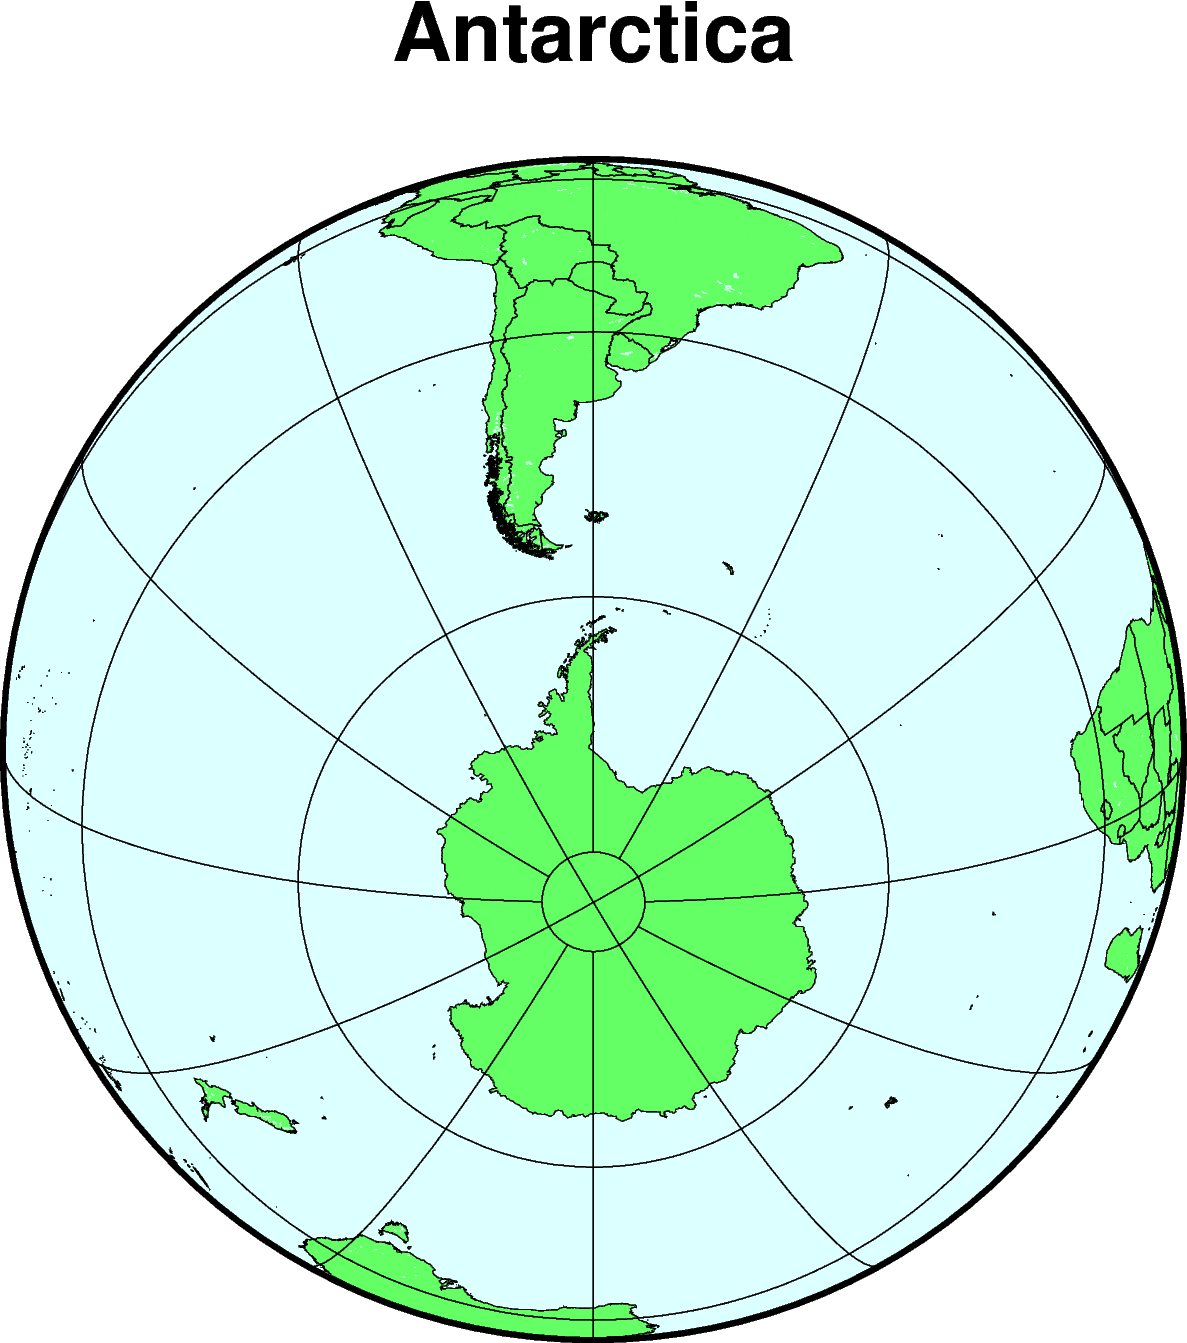

In [6]:
# Antarctica
fig6=pygmt.Figure()
fig6.coast(projection='G-60/-75/10c',  #B 
           region='g',   #global 
           frame= ['+tAntarctica','g'], #gridded 
           land='100/255/100', water='220/255/255', shorelines='1/0.2p',
           resolution='l', 
           borders=1
          )
fig6.show()

## Some other projections
### Robinson - a growing fav.
a non-preserving represnetation that balances angle/area distortion for reasonable global viewability 

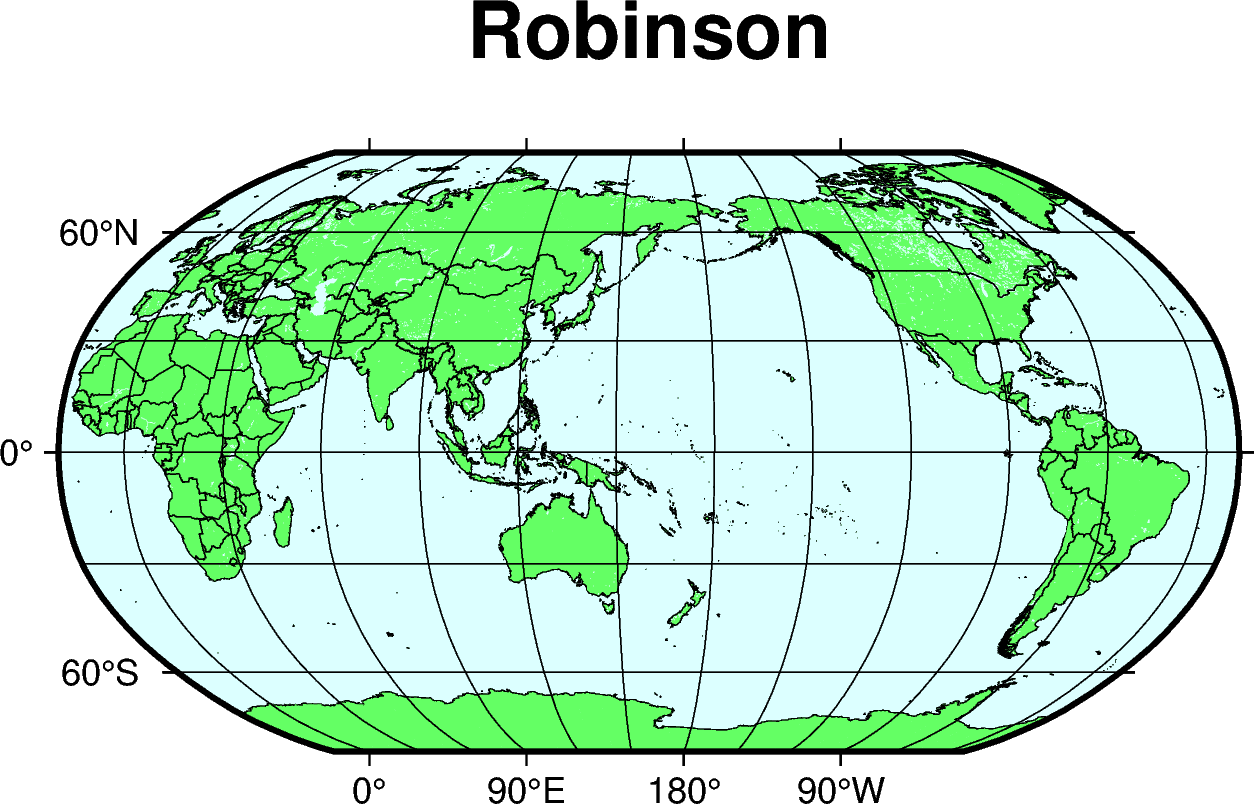

In [7]:
fig7=pygmt.Figure()
fig7.coast(projection='N-200/10c',  #pacific-centric w/o chopping Africa
           region='g',  # global 
           frame=['WSen+tRobinson','xag30', 'yag30'], 
           land='100/255/100', water='220/255/255',shorelines='1/0.2p',
           resolution='l', 
           borders=1
          )
fig7.show()

### Mollweide
similar, but with less-distorted poles

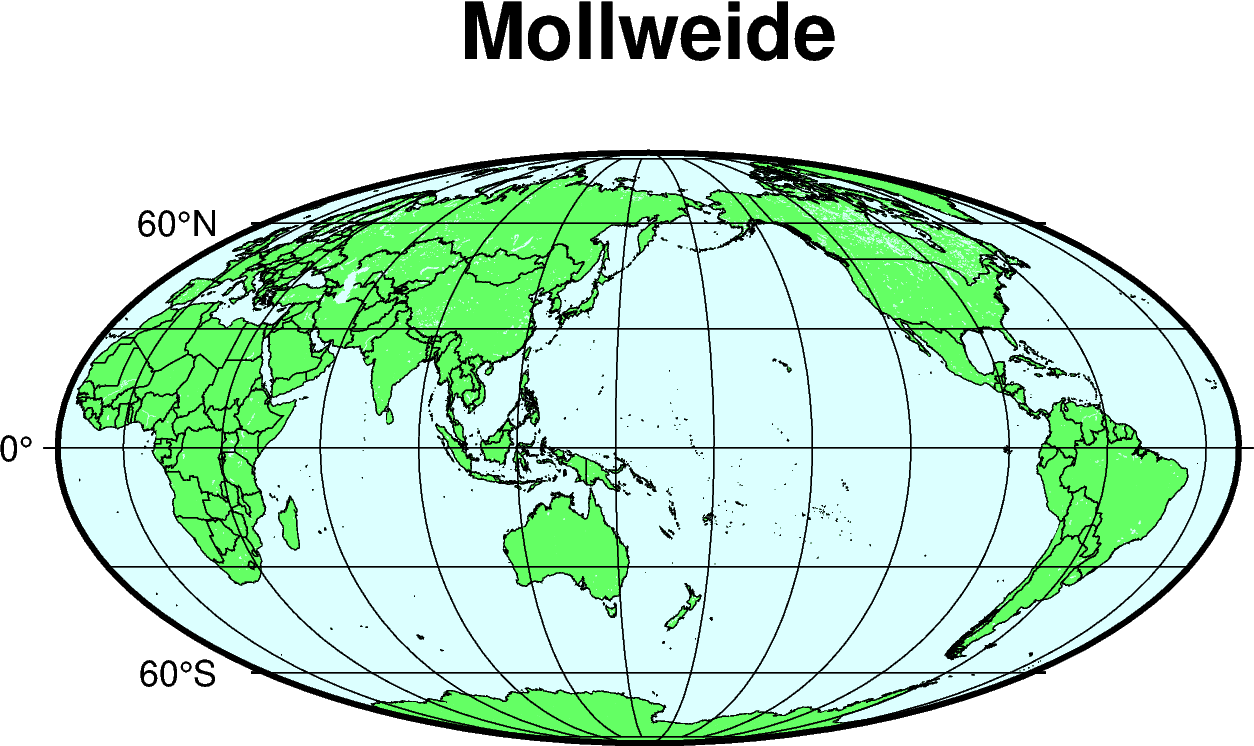

In [8]:
fig8=pygmt.Figure()
fig8.coast(projection='W-200/10c',  #pacific-centric w/o chopping Africa
           region='g',  # global 
           frame=['WSen+tMollweide','xag30', 'yag30'], 
           land='100/255/100', water='220/255/255',shorelines='1/0.2p',
           resolution='l', 
           borders=1
          )
fig8.show()

### General Perspective
regional far-field perspective view 

coast [WARNING]: 1 annotations along the bottom border were skipped due to crowding.
coast [WARNING]: 4 annotations along the right border were skipped due to crowding.
coast [WARNING]: 3 annotations along the left border were skipped due to crowding.
coast [WARNING]: Crowding decisions is controlled by MAP_ANNOT_MIN_SPACING, currently set to 25.2p.
coast [WARNING]: Decrease or increase MAP_ANNOT_MIN_SPACING to see more or fewer annotations, with 0 showing all annotations.


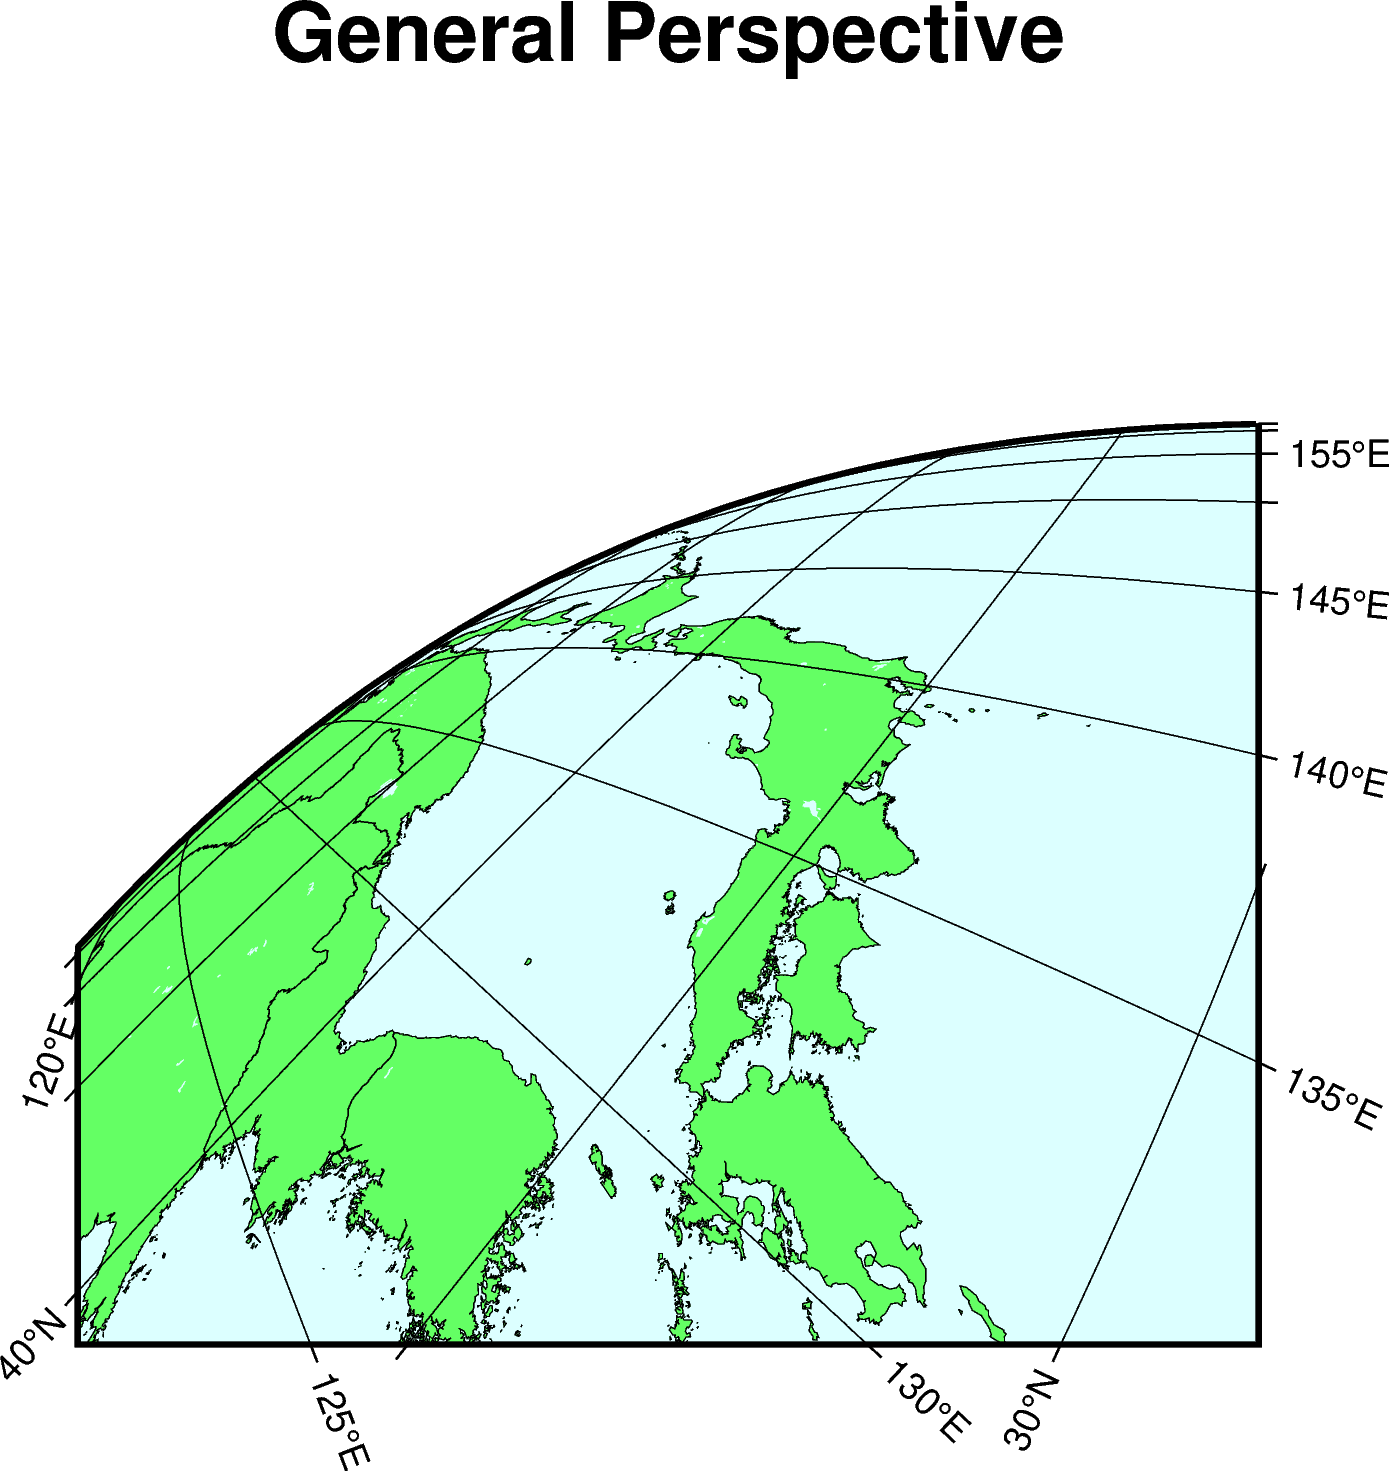

In [10]:
fig9 = pygmt.Figure()
fig9.coast(
    projection="G130/30/10c+a30+t45+v40/40+w25+z1000",
        #perspective from 130/30 #10c accross
        #[a]zim = 30, [t]ilt = 45
        #[v]iewpoint width/height=40 (square=larger is more fish-eye)
        #[w]twist=25, [z]altitutde=1000 from surface in km
    region="g",
    frame=['+tGeneral Perspective',"x5g5", "y5g5"],
    land='100/255/100', water='220/255/255',shorelines='1/0.2p',
    resolution='i', 
    borders=1
)
fig9.show()